In [24]:
from PIL import Image
import requests
from io import BytesIO
import urllib3
urllib3.disable_warnings()

def show_image(url, size = (8,8)):
    response = requests.get(url,verify=False)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize = size)
    plt.axis('off')
    _ = plt.imshow(img, interpolation='lanczos')
    
def show_image_loc(url, size = (6,8)):
    img = Image.open(url)
    plt.figure(figsize = size)
    plt.axis('off')
    _ = plt.imshow(img, interpolation='lanczos')    

<h3>Exercise on laboratory:</h3> 
Build a neural network for newsgruops messages classification problem from <b>lab4.ipynb.</b> <br>
Try using larger or smaller layers. Try diffrent nubmbers of layers.

# Neural networks #


### Recomended book: ''Deep Learning with Python'' ###
 - Python + Keras
 - Author: François Chollet (also Keras author)  <br> 
 - First printing: October 2017 <br> 
 - Many diagrams in this notebook comes from this book.  <br> 
 - gen lib ?
 - also: https://keras.io/api/

In [2]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.0'

### Keras Installation ###

For instructions see e.g. Deep Learning with Python, Appendix A

pip install tensorflow<br>
pip install keras<br>

If you have GPU:<br>
pip install tensorflow-gpu<br>

https://developer.nvidia.com/cudnn
The NVIDIA CUDA® Deep Neural Network library (cuDNN) is a GPU-accelerated library of primitives for deep neural networks.

Alternatively:
Google Colab: https://research.google.com/colaboratory/faq.html

### MNIST dataset ###
classify images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9). 


In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [18]:
test_images.shape

(10000, 28, 28)

5

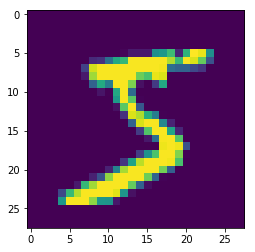

In [19]:
import matplotlib.pyplot as plt
img0 = train_images[0,:,:]
_ = plt.imshow(img0)
train_labels[0]

### Automatic feature extraction  ###

1. The core building block of neural networks is a <b>layer</b>.
2. Each consecutive layer perform transformation on data to extracts <br>
 more meaningful (for the given problem) representations of data.
3. <b>Last layer</b> is the final, purified reprentation of the input, <br>
e.g. <b>probability distribiution</b> on space of possible categories.
4. Deep learning ~ a long chain of simple transofrmations.<br>

Deep NN has often has a large number of parameters to train and requiers large datasets but enables <b>automatic feature extraction</b> (e.g. with tf-idf).


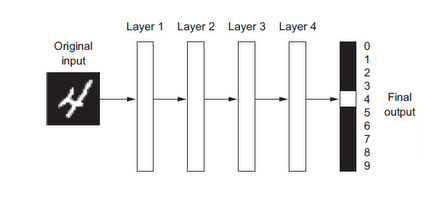

In [25]:
show_image('http://ki.pwr.edu.pl/lemiesz/info/represenation.png', size=(7,7))

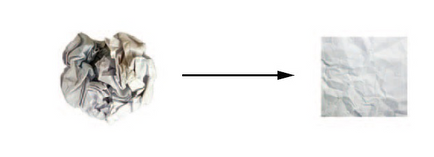

In [26]:
show_image('http://ki.pwr.edu.pl/lemiesz/info/paper.jpg', size=(7,7))
# From ,,Deep Learning with Python":
# That crumpled paper ball is your input data; 
# we need to figure out a transformation
# that would uncrumple it, so as to make the 
# classes cleanly separable

### A simple model ###

In [27]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',#<--'SGD'
                loss='categorical_crossentropy',
                metrics=['accuracy'])

  <b>Loss function:</b> crossentropy on discrete probability distribiutions <br>
 <b>Optimizer:</b> some version of stochastic gradient descent 
 




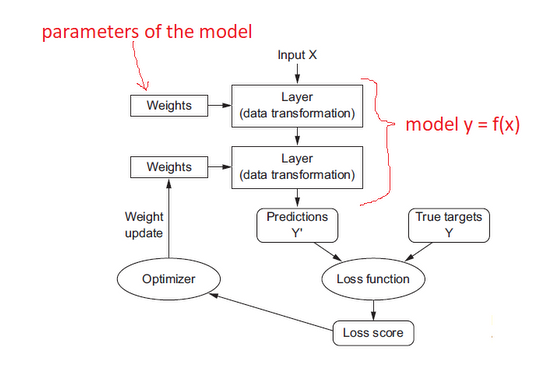

In [28]:
show_image('http://ki.pwr.edu.pl/lemiesz/info/scheme.png', size=(9,9))

### Dense layer with ReLU ###

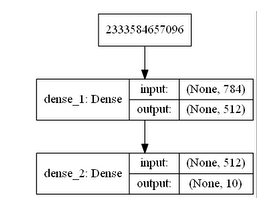

In [12]:
# We can use keras util for visualization
from keras.utils import plot_model
plot_model(network, to_file='network.png', show_shapes=True)
show_image_loc('network.png', size=(4,4))

`Dense layer` = fully-connected, is described by the weight matrix $\mathbf{W}$ that have shape (output_dimension, input_dimension) and the bias vector $\mathbf{\vec{b}}$. The dot product with W will project the input data onto output representation space. 

$$
 {\begin{bmatrix}w_1&w_2&w_3\\w_4&w_5&w_6\end{bmatrix}}\cdot {\begin{bmatrix}x_1\\x_2\\x_3\end{bmatrix}} + {\begin{bmatrix}b_1\\b_2\end{bmatrix}}={\begin{bmatrix}y_1\\y_2\end{bmatrix}}
$$

`ReLU` = Rectified Linear Unit, non-linear ''activation function''

 $$ReLU(x) = max(0, x)$$
 
`output` = ReLU is <b>applied element-wise</b> on the transofmration result

$$\mathbf{\vec{y}} = ReLU(\mathbf{W} \cdot \mathbf{\vec{x}} + \mathbf{\vec{b}})$$

Fully-connected layers are often used to reduce the number of parameters and so the size of the representation, while saving most of the useful information. 

Insert diagram here

### Softmax layer ###

For a vector $\mathbf {z} \in \mathbb {R} ^{K}$ softmax function $\sigma(\mathbf {z})$ is defined as 

$$\sigma (\mathbf {z} )_{j}={\frac {e^{z_{j}}}{\sum _{k=1}^{K}e^{z_{k}}}}
\;\;\;\;\;\;\;\;\;\;\;for\;\;\;\; j=1,\ldots,K~.
$$

Namely, we would like to have on the output an array of 10 probability scores summing to 1. <br> It may be considered as a generalization of sigmoid function to multi-class problem (see Ex. 25).

<b> Interpretation: </b> softmax can be consider
a smooth approximation of the $argmax$ function with one-hot representation of the output:

$$ argmax (z_{1},\dots ,z_{n})=(0,\dots ,0,1,0,\dots ,0)$$

where $1$ in the output indicates unique maximum value among $z_{1},\dots ,z_{n}$.



### Layer size ###

<b> How many "hidden units" to chose for each layer? </b>

Having more hidden units (a higher-dimensional representation space) allows to learn more complex representations, but it makes model more computationally expensive and may lead to overfitting.

You should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.


### Number of layers  ###

<a href=https://en.wikipedia.org/wiki/Universal_approximation_theorem>Universal approximation theorem</a> states that (Wikipedia)


>''network with a single hidden layer containing a finite number of units can approximate continuous functions on compact subsets of $R^n$, under mild assumptions on the activation function''


Intuition $\approx$ can make shallow neural network arbitrarily close to a given function by increasing the number of hidden units.
 
Hierarchical structure of deep networks allows to more easly learn the hierarchies of knowledge, which is useful in practice (e.g. automatic feature extraction in image recognition). 

### Adjusting input data ###

In [10]:
# Reshaping data into the shape that the network expects,
# and scaling it so that all values are in  the `[0, 1]`

train_images_flat = train_images.reshape((60000, 28 * 28))
train_images_flat = train_images_flat.astype('float32') / 255

test_images_flat = test_images.reshape((10000, 28 * 28))
test_images_flat = test_images_flat.astype('float32') / 255


### One-hot encoding for labels ###

In [11]:
# Encode labes in 'one-hot' style

train_labels.shape

(60000,)

In [12]:
train_labels[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [13]:
from keras.utils import to_categorical
train_labels_oneHot = to_categorical(train_labels)
test_labels_oneHot = to_categorical(test_labels)
train_labels_oneHot.shape

(60000, 10)

In [14]:
train_labels_oneHot[0,:]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
train_images_flat.shape

(60000, 784)

### Train the model ###

In [16]:
# history = network.fit(train_images, train_labels, epochs=5, batch_size=128)
history = network.fit(train_images_flat,
                    train_labels_oneHot,
                    epochs=30,
                    batch_size=128,
                    validation_data=(test_images_flat, test_labels_oneHot))

NameError: name 'network' is not defined

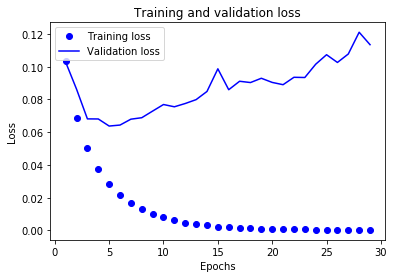

In [54]:
history_dict = history.history
history_dict.keys()
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

ep=len(acc)
epochs = range(1, ep)

# "bo" is for "blue dot"
plt.plot(epochs,loss[1:ep], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss[1:ep], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Back-propagation #

1. Select an observation   $\;\;i\;\;$   from the current minibatch 


2. <b>Forward pass:</b> find values for each $\;\;z_j^l\;\;$ and $\;\;a_j^l\;\;$ 


3. <b>Back-propagation:</b> compute all errors $\;\;\delta_j^l = \frac{\partial J}{\partial z_{j}^l}  \;\;$  starting from the last  layer


4. <b>Gradient for weights $∇_W J$:</b> for all weights $w_{ij}^l$ compute $$\frac{\partial J}{\partial w_{ij}^l} = \delta_j^l \cdot a_i^{l-1}  $$ 


5. <b>Mini-batch average:</b> repeat for all samples in the minibatch and take the avarage: 
$$\frac{\sum_{i\in B} ∇_W J^{(i)}}{|B|} \approx ∇_W^{Av} J$$


6. <b>Gradient Descent</b>: update the weights
$$ W = W - \alpha  ∇_W^{Av} J$$


7. Repeat over every mini-batch, and for the desired number of epochs